# Entregável 1 - Visão Computacional

In [52]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.4.0 


# Equalização de Histograma

In [53]:
rintin = cv2.imread("RinTinTin.jpg")

In [54]:
rintin.shape

(240, 320, 3)

In [55]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [56]:
rintin_gray.shape

(240, 320)

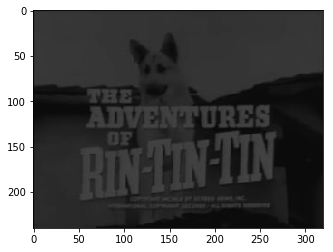

In [57]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

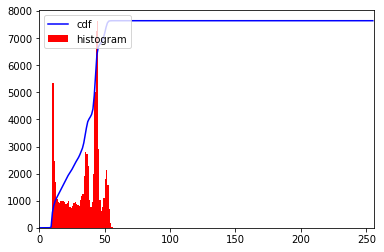

In [58]:
hist, bins = np.histogram(rintin_gray.flatten(), 256, [0 ,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(), 256, [0, 256], color = 'r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

O histograma fornecido não aproveita bem as faixas de cores.

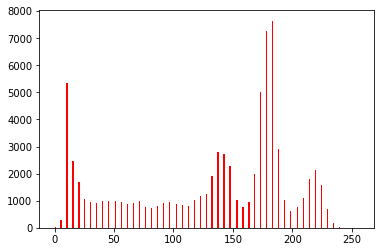

In [65]:
hist_ok = rintin_gray
for i in range(len(hist_ok)):
    for j in range(len(hist_ok[0])):
        hist_ok[i][j] = (hist_ok[i][j]-rintin_gray.min())* 255 / rintin_gray.max()
        
plt.hist(hist_ok.flatten(), 256, [0, 256], color = 'r')
plt.show()

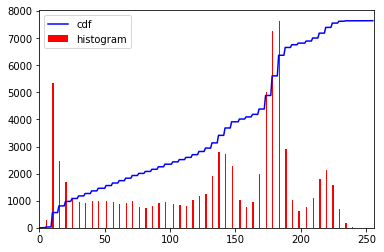

In [66]:
hist, bins = np.histogram(hist_ok.flatten(), 256, [0 ,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(), 256, [0, 256], color = 'r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.show()

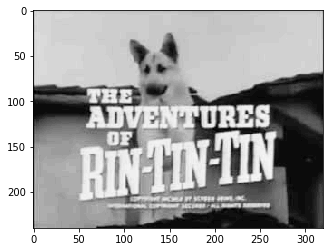

In [67]:
plt.imshow(rintin_gray, cmap = "Greys_r", vmin = 0, vmax = 255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


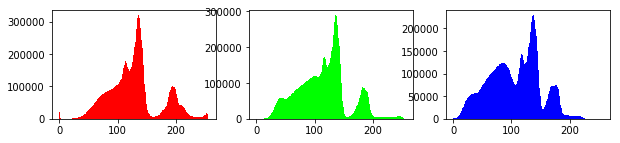

In [68]:
cores = cv2.imread("hall_box_battery1.jpg")
cores = cv2.cvtColor(cores, cv2.COLOR_BGR2RGBA)

hist,bins = np.histogram(cores.flatten(), 256, [0, 256])

fig, ax = plt.subplots(1, 3, figsize = (10,2))
ax[0].hist(cores[:,:,0].flatten(),256,[0,256], color = "#ff0000")
ax[1].hist(cores[:,:,1].flatten(),256,[0,256], color = "#00ff00")
ax[2].hist(cores[:,:,2].flatten(),256,[0,256], color = "#0000ff")
plt.show()

Não.

In [69]:
cores = cv2.imread("hall_box_battery1.jpg")
cores = cv2.cvtColor(cores, cv2.COLOR_BGR2HSV)

In [70]:
def caixa(img):
    for i in range(len(img)):
        for j in range(len(img[i])):
            if img[i, j, 0] < 8 and img[i, j, 0] > 0:
                img[i, j] = [255, 255, 255]
            else:
                img[i, j] = [0, 0, 0]
    return img

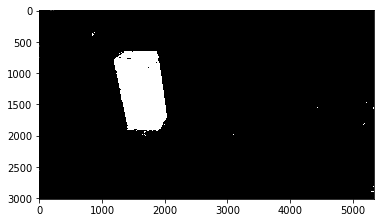

In [71]:
plt.imshow(caixa(cores), vmin = 0, vmax = 255)